<a href="https://colab.research.google.com/github/greypen2006/biophilic-design/blob/main/mac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:


from google.colab import files
uploaded = files.upload()



Saving MAC1.csv to MAC1.csv


In [26]:
from matplotlib import pyplot as plt
from matplotlib import pylab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

ex_hist=pd.read_csv('MAC1.csv')
df=ex_hist['MAC'] # Changed column name from 'Marginal Abatement\nCost (1000 GBP/tC02e)' to 'MAC'

In [27]:
ex_hist

,Technology,Abatement Potential,Cumulated Abatement,MAC,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Solar PV,46.7,46.7,-15.33191,NaN,NaN,NaN,NaN
1,Heat Pump,"2,348","2,395",-0.94010,NaN,NaN,NaN,NaN
2,LED Smart Sensors,2200,"4,595",0.02591,NaN,NaN,NaN,NaN
3,Smart Building AI Optimisation,"4,889.86","9,485",0.34561,NaN,NaN,NaN,NaN
4,Triple glazing,4178.71,"13,663",0.69399,NaN,NaN,NaN,NaN
5,Cooling Towers Water Treatment,134.77,"13,798",1.33902,NaN,NaN,NaN,NaN


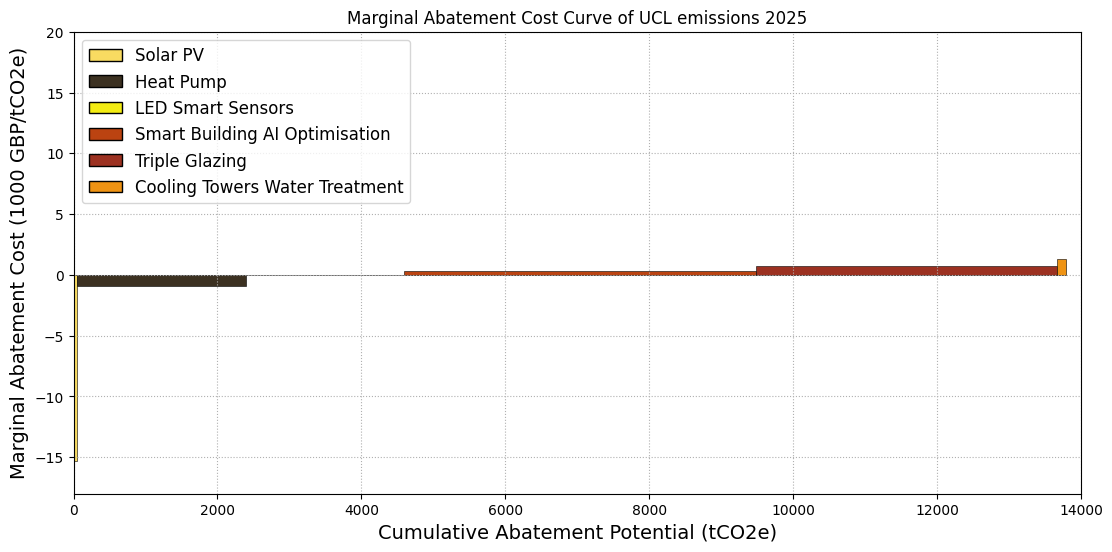

<Figure size 640x480 with 0 Axes>

In [36]:
df = ex_hist
# Convert 'Abatement Potential' to numeric, handling commas
df['Abatement Potential'] = df['Abatement Potential'].astype(str).str.replace(',', '', regex=False).astype(float)
df['MAC'] = df['MAC'].astype(str).str.replace(',', '', regex=False).astype(float)

larghezza=df['Abatement Potential'].tolist()

yy=df['MAC'].tolist()
cc=df['Technology'].tolist()
df['xcum']=df['Abatement Potential'].cumsum()
df['xcum2']=[0]+df['xcum'].tolist()[:-1]

xx=df['xcum2'].tolist()


fig, ax = plt.subplots(figsize=(13,6))

dic_col={'Solar PV': '#F9DB61', 'Heat Pump': '#3C3121','LED Smart Sensors': '#F3EC13','Smart Building AI Optimisation':'#BB4311', 'Triple glazing': '#9C3121', 'Cooling Towers Water Treatment':'#EF9313'}

col=[]
for a in range(len(cc)):
    col.append(dic_col[cc[a]])

plt.bar(xx, yy, width=larghezza,  align='edge', color=col, edgecolor='black', linewidth=0.4)

PV_patch = mpatches.Patch(facecolor='#F9DB61', edgecolor='black', label='Solar PV')
heat_patch = mpatches.Patch(facecolor='#3C3121', edgecolor='black',label='Heat Pump')
LED_patch = mpatches.Patch(facecolor='#F3EC13', edgecolor='black',label='LED Smart Sensors')


W_patch = mpatches.Patch(facecolor='#BB4311', edgecolor='black',label='Smart Building AI Optimisation')

W_off_patch = mpatches.Patch(facecolor='#9C3121', edgecolor='black',label='Triple Glazing')



CT_patch = mpatches.Patch(facecolor='#EF9313', edgecolor='black',label='Cooling Towers Water Treatment')




plt.legend(handles=[PV_patch, heat_patch, LED_patch, W_patch, W_off_patch,  CT_patch], loc=2, fontsize=12)

plt.ylim(-18, 20)
plt.xlim(0, 14000)
plt.ylabel(r'Marginal Abatement Cost (1000 GBP/tCO2e)', fontsize=14)
plt.xlabel(r'Cumulative Abatement Potential (tCO2e)', fontsize=14)
plt.title('Marginal Abatement Cost Curve of UCL emissions 2025')
plt.grid(linestyle='dotted')
plt.show()

pylab.savefig("MAC.png", bbox_inches="tight", dpi=300)

Data Preview:
                       Technology  Abatement Potential  Cumulated Abatement  \
0                        Solar PV                46.70                46.70   
1  Smart Building AI Optimisation              2200.00              2246.70   
2                  Triple glazing              4889.86              7136.56   
3                       Heat Pump              4178.71             11315.27   
4               LED Smart Sensors              2348.00             13663.27   

        MAC  
0 -15.33191  
1   0.02591  
2   0.34561  
3   0.69399  
4   0.94010  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Technology           6 non-null      object 
 1   Abatement Potential  6 non-null      float64
 2   Cumulated Abatement  6 non-null      float64
 3   MAC                  6 non-null      float64
dtypes: float64

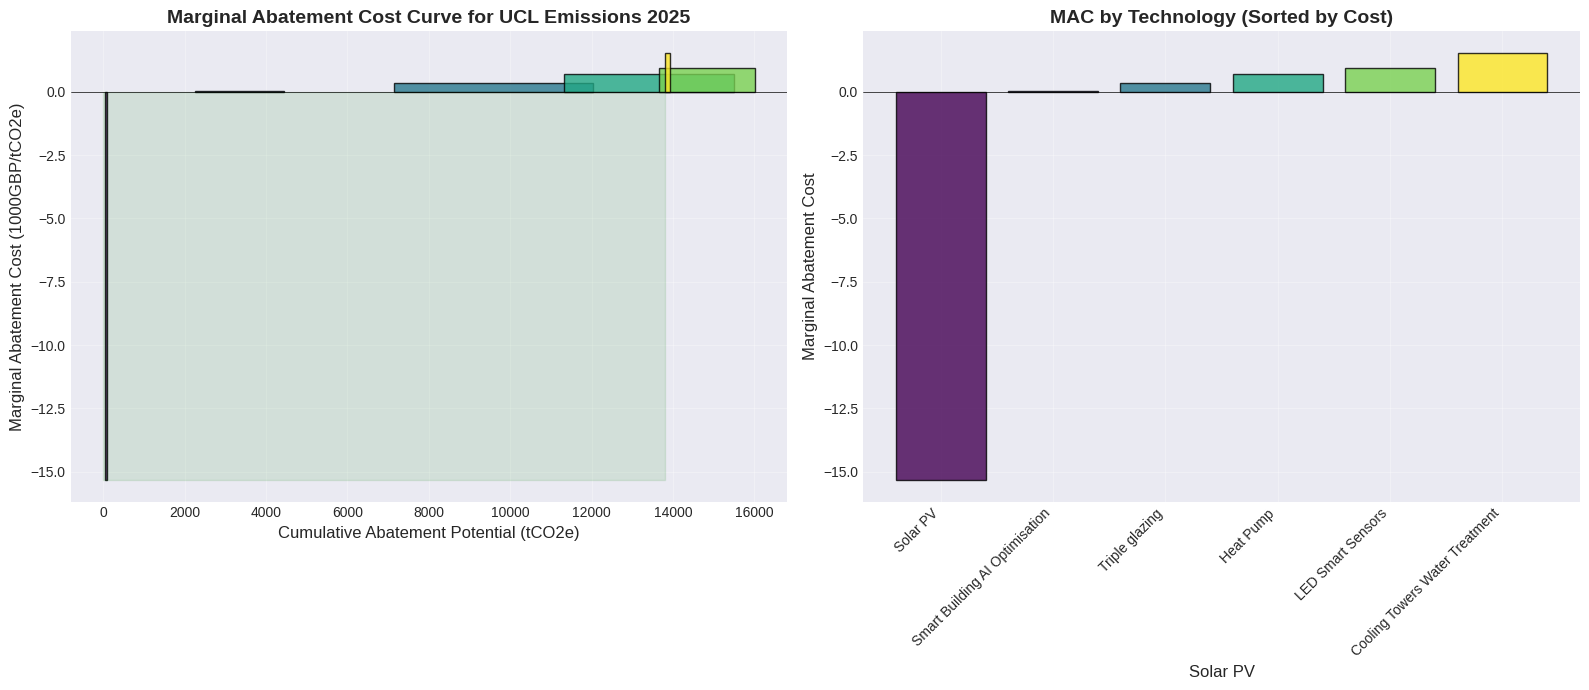

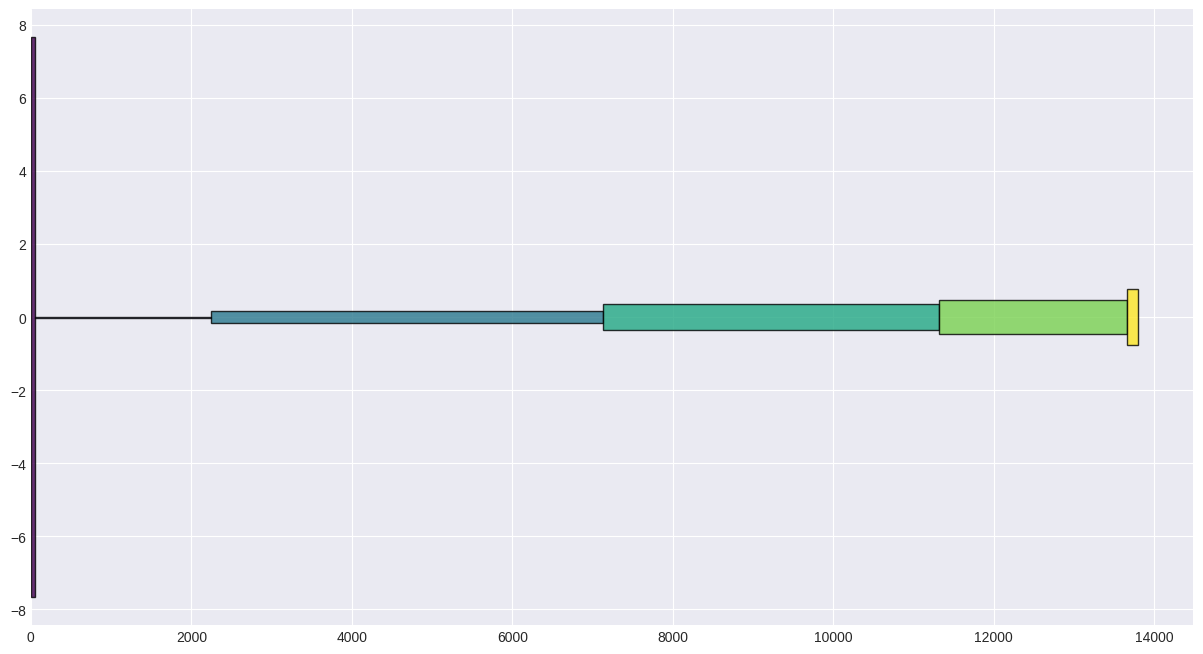

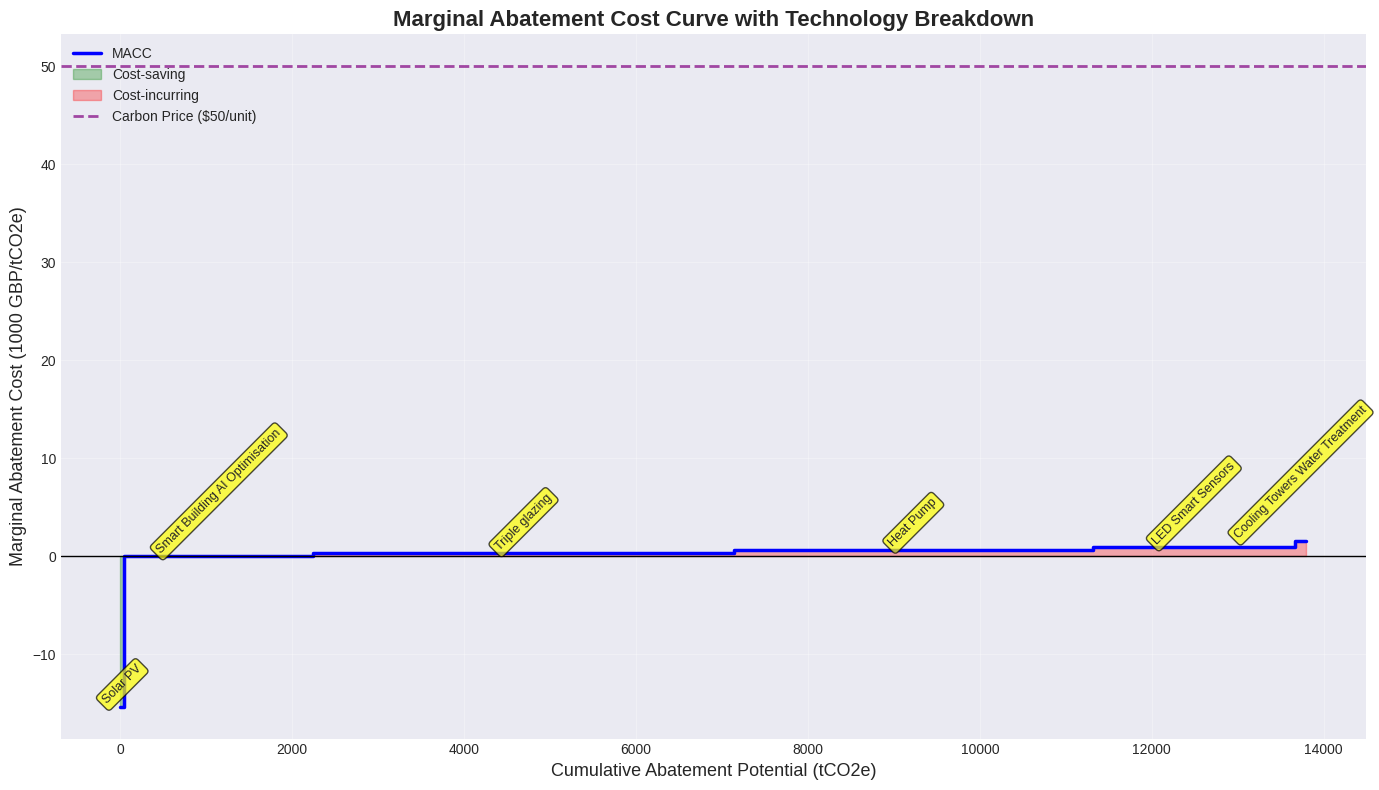


MACC ANALYSIS SUMMARY

Total Abatement Potential: 13798.04 units
Number of Technologies: 6
Cost-saving Measures: 1
Cost-incurring Measures: 5
Average MAC: $-1.97/unit
Median MAC: $0.52/unit

At carbon price of $50/unit:
  - Economically viable abatement: 13798.04 units
  - Percentage of total: 100.0%

TECHNOLOGIES SORTED BY MAC (Cheapest First)
                    Technology  Abatement Potential     MAC Cumulative_Abatement
                      Solar PV                46.70 $-15.33                46.70
Smart Building AI Optimisation              2200.00   $0.03              2246.70
                Triple glazing              4889.86   $0.35              7136.56
                     Heat Pump              4178.71   $0.69             11315.27
             LED Smart Sensors              2348.00   $0.94             13663.27
Cooling Towers Water Treatment               134.77   $1.54             13798.04


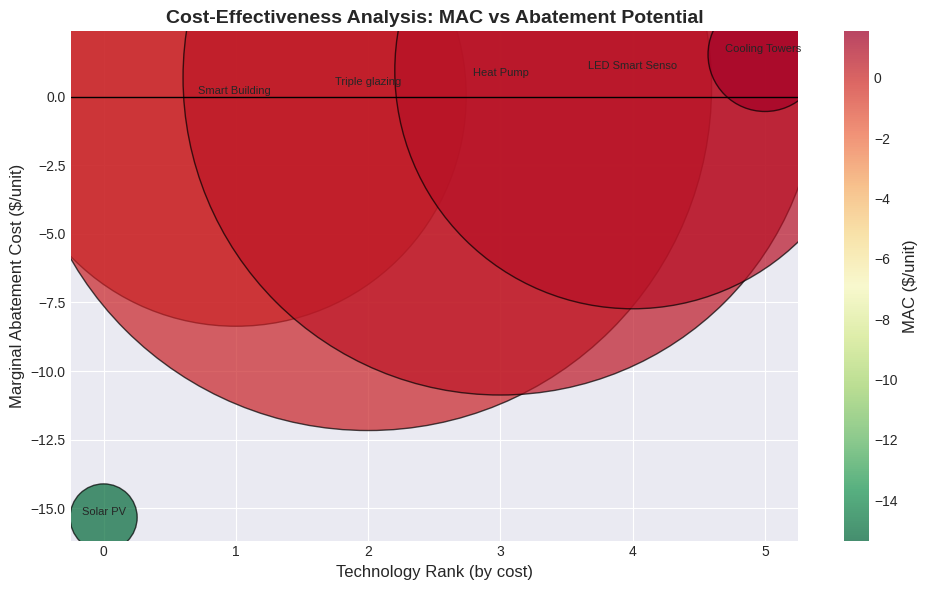


Processed data saved to 'processed_macc_data.csv'


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings('ignore')

# Set style for better visuals
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load your CSV data
# Replace 'macc_data.csv' with your actual filename
ex_hist=pd.read_csv('MAC(Sheet1)(1).csv')
df=ex_hist # Corrected: Assign the entire DataFrame to df

# Convert 'Abatement Potential' and 'Cumulated Abatement' to numeric, handling commas
df['Abatement Potential'] = df['Abatement Potential'].str.replace(',', '').astype(float)
df['Cumulated Abatement'] = df['Cumulated Abatement'].str.replace(',', '').astype(float)

# Display first few rows to understand the structure
print("Data Preview:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Calculate cumulative abatement
df['Cumulative_Abatement'] = df['Abatement Potential'].cumsum()

# Normalize cumulative abatement if needed (percentage of total)
total_abatement = df['Abatement Potential'].sum()
df['Cumulative_Percentage'] = (df['Cumulative_Abatement'] / total_abatement) * 100

# Create the basic Marginal Abatement Cost Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Basic MACC
colors = plt.cm.viridis(np.linspace(0, 1, len(df)))

for i in range(len(df)):
    ax1.bar(df.loc[i, 'Cumulative_Abatement'],
            df.loc[i, 'MAC'],
            width=df.loc[i, 'Abatement Potential'],
            align='edge',
            color=colors[i],
            edgecolor='black',
            alpha=0.8)

ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax1.set_xlabel('Cumulative Abatement Potential (tCO2e)', fontsize=12)
ax1.set_ylabel('Marginal Abatement Cost (1000GBP/tCO2e)', fontsize=12)
ax1.set_title('Marginal Abatement Cost Curve for UCL Emissions 2025', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add a zero-cost line reference
ax1.fill_between([0, df['Cumulative_Abatement'].max()],
                 0, df['MAC'].min() if df['MAC'].min() < 0 else 0,
                 alpha=0.1, color='green', label='Cost-saving measures')

# Plot 2: Enhanced MACC with technology labels
ax2.bar(range(len(df)), df['MAC'],
        color=colors, edgecolor='black', alpha=0.8)

# Add technology labels (rotated for readability)
ax2.set_xticks(range(len(df)))
ax2.set_xticklabels(df['Technology'], rotation=45, ha='right', fontsize=10)
ax2.set_xlabel('Solar PV', fontsize=12)
ax2.set_ylabel('Marginal Abatement Cost', fontsize=12)
ax2.set_title('MAC by Technology (Sorted by Cost)', fontsize=14, fontweight='bold')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create a more detailed single plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plot stepped MACC
cumulative = 0
for idx, row in df.iterrows():
    ax.barh(0, row['Abatement Potential'],
            height=row['MAC'],
            left=cumulative,
            color=colors[idx],
            edgecolor='black',
            alpha=0.8)
    cumulative += row['Abatement Potential']

# Alternative: Plot as a step function (more traditional MACC)
fig, ax = plt.subplots(figsize=(14, 8))

# Create step data for MACC
step_x = [0]
step_y = [df.loc[0, 'MAC']]

for i in range(len(df)):
    step_x.append(df.loc[i, 'Cumulative_Abatement'])
    step_x.append(df.loc[i, 'Cumulative_Abatement'])
    if i < len(df) - 1:
        step_y.append(df.loc[i, 'MAC'])
        step_y.append(df.loc[i+1, 'MAC'])
    else:
        step_y.append(df.loc[i, 'MAC'])
        step_y.append(df.loc[i, 'MAC'])

# Plot the step function
ax.plot(step_x, step_y, 'b-', linewidth=2.5, label='MACC')

# Fill areas based on cost
ax.fill_between(step_x, step_y, where=(np.array(step_y) <= 0),
                color='green', alpha=0.3, label='Cost-saving')
ax.fill_between(step_x, step_y, where=(np.array(step_y) > 0),
                color='red', alpha=0.3, label='Cost-incurring')

# Add technology labels at midpoints
for i, row in df.iterrows():
    mid_point = row['Cumulative_Abatement'] - (row['Abatement Potential'] / 2)
    ax.text(mid_point, row['MAC'] + (0.02 * df['MAC'].max()),
            row['Technology'], # Corrected: Changed 'Mitigation_Technology' to 'Technology'
            rotation=45, ha='center', va='bottom', fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.set_xlabel('Cumulative Abatement Potential (tCO2e)', fontsize=13)
ax.set_ylabel('Marginal Abatement Cost (1000 GBP/tCO2e)', fontsize=13)
ax.set_title('Marginal Abatement Cost Curve with Technology Breakdown',
             fontsize=16, fontweight='bold')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

# Add a reference line for carbon price if available
carbon_price = 50  # Example carbon price, change as needed
ax.axhline(y=carbon_price, color='purple', linestyle='--',
           linewidth=2, alpha=0.7, label=f'Carbon Price (${carbon_price}/unit)')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Create a summary table
print("\n" + "="*80)
print("MACC ANALYSIS SUMMARY")
print("="*80)

# Calculate key metrics
total_cost_saving = df[df['MAC'] < 0]['MAC'].sum() * \
                    df[df['MAC'] < 0]['Abatement Potential'].sum() / \
                    len(df[df['MAC'] < 0]) if len(df[df['MAC'] < 0]) > 0 else 0

total_cost_incurring = df[df['MAC'] > 0]['MAC'].sum() * \
                       df[df['MAC'] > 0]['Abatement Potential'].sum() / \
                       len(df[df['MAC'] > 0]) if len(df[df['MAC'] > 0]) > 0 else 0

print(f"\nTotal Abatement Potential: {total_abatement:.2f} units")
print(f"Number of Technologies: {len(df)}")
print(f"Cost-saving Measures: {len(df[df['MAC'] < 0])}")
print(f"Cost-incurring Measures: {len(df[df['MAC'] > 0])}")
print(f"Average MAC: ${df['MAC'].mean():.2f}/unit")
print(f"Median MAC: ${df['MAC'].median():.2f}/unit")

# Identify breakeven point
breakeven_idx = df[df['MAC'] <= carbon_price].index.max() if 'carbon_price' in locals() else None
if breakeven_idx is not None:
    breakeven_abatement = df.loc[breakeven_idx, 'Cumulative_Abatement']
    print(f"\nAt carbon price of ${carbon_price}/unit:")
    print(f"  - Economically viable abatement: {breakeven_abatement:.2f} units")
    print(f"  - Percentage of total: {(breakeven_abatement/total_abatement)*100:.1f}%")

# Display the sorted data
print("\n" + "="*80)
print("TECHNOLOGIES SORTED BY MAC (Cheapest First)")
print("="*80)
display_df = df[['Technology', 'Abatement Potential', 'MAC', 'Cumulative_Abatement']].copy() # Corrected: Changed 'Mitigation_Technology' to 'Technology'
display_df['MAC'] = display_df['MAC'].apply(lambda x: f"${x:.2f}")
display_df['Cumulative_Abatement'] = display_df['Cumulative_Abatement'].apply(lambda x: f"{x:.2f}")
print(display_df.to_string(index=False))

# Create a cost-effectiveness analysis
fig, ax = plt.subplots(figsize=(10, 6))

# Bubble chart: Size = Abatement Potential, Color = MAC
scatter = ax.scatter(df.index, df['MAC'],
                     s=df['Abatement Potential']*50,  # Scale bubble size
                     c=df['MAC'],
                     cmap='RdYlGn_r',  # Red-Yellow-Green reversed (green = negative)
                     alpha=0.7,
                     edgecolor='black')

# Add labels
for i, row in df.iterrows():
    ax.text(i, row['MAC'], row['Technology'][:15], # Corrected: Changed 'Mitigation_Technology' to 'Technology'
            fontsize=8, ha='center', va='bottom')

ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.set_xlabel('Technology Rank (by cost)', fontsize=12)
ax.set_ylabel('Marginal Abatement Cost ($/unit)', fontsize=12)
ax.set_title('Cost-Effectiveness Analysis: MAC vs Abatement Potential',
             fontsize=14, fontweight='bold')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('MAC ($/unit)', fontsize=12)

plt.tight_layout()
plt.show()

# Export the processed data
df.to_csv('processed_macc_data.csv', index=False)
print("\nProcessed data saved to 'processed_macc_data.csv'")

# Task
Correct the data loading and processing in cell `fxs7FgR7LmeY` to properly download the CSV file `MAC(Sheet1).csv` from `https://storage.googleapis.com/MAC(Sheet1).csv` and load it into the DataFrame `df`. Then, fix the 'SyntaxWarning: invalid escape sequence '\m'' in cell `tgteMzFMU8l0` by using raw strings for the ylabel and xlabel.

## fix_syntax_warning_in_tgteMzFMU8l0

### Subtask:
Fix the 'SyntaxWarning: invalid escape sequence '\m'' in cell tgteMzFMU8l0 by using raw strings for the ylabel and xlabel.


**Reasoning**:
The subtask requires fixing a SyntaxWarning by converting `ylabel` and `xlabel` strings to raw strings in cell `tgteMzFMU8l0`. I will update the code in that cell accordingly.



In [ ]:
larghezza=df['CO2 Abatement Potential (tCO2e)'].tolist()

yy=df['Marginal Abatement\nCost (1000 GBP/tC02e)'].tolist()
cc=df['Technology Option'].tolist()
df['xcum']=df['CO2 Abatement Potential (tCO2e)'].cumsum()
df['xcum2']=[0]+df['xcum'].tolist()[:-1]

xx=df['xcum2'].tolist()


fig, ax = plt.subplots(figsize=(13,6))
plt.rcParams["font.family"] = "Calibri"

dic_col={'Solar PV': '#F9DB61', 'Smart Building AI Optimisation':'#EB8627', 'Triple Glazing': '#9C3121', 'Heat Pump': '#9D3121', 'LED Smart Sensors': '#4C3121', 'Cooling Towers Water Treatment' : '#4C3333'}

col=[]
for a in range(len(cc)):
    col.append(dic_col[cc[a]])

plt.bar(xx, yy, width=larghezza,  align='edge', color=col, edgecolor='black', linewidth=0.4)

PV_patch = mpatches.Patch(facecolor='#F9DB61', edgecolor='black', label='Solar PV')

W_patch = mpatches.Patch(facecolor='#EB8627', edgecolor='black',label='Smart Building AI Optimisation')

W_off_patch = mpatches.Patch(facecolor='#9C3121', edgecolor='black',label='Triple Glazing')

heat_patch = mpatches.Patch(facecolor='#9D3121', edgecolor='black',label='Heat Pump')

LED_patch = mpatches.Patch(facecolor='#4C3121', edgecolor='black',label='LED Smart Sensors')

C_patch = mpatches.Patch(facecolor='#4C3333', edgecolor='black',label='Cooling Towers Water Treatment')




plt.legend(handles=[PV_patch,  W_patch, W_off_patch, heat_patch, LED_patch, C_patch], loc=2, fontsize=12)

plt.ylim(-100, 1500)
plt.ylabel(r'Cost of Carbon abatement [GBP/t saved $\mathregular{CO_2}$]', fontsize=14)
plt.xlabel(r'[Mt $\mathregular{CO_2}$]', fontsize=14)
plt.grid(linestyle='dotted')
plt.show()

pylab.savefig("MAC.png", bbox_inches="tight", dpi=300)

NameError: name 'df' is not defined

**Reasoning**:
The previous execution failed because 'df' was not defined. This is due to the failure in the data loading cell `fxs7FgR7LmeY`. I need to fix the `curl` command to correctly download the CSV file (by quoting the URL) and then properly load it into the DataFrame `df` using `pd.read_csv`.



In [ ]:
from matplotlib import pyplot as plt
from matplotlib import pylab
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

!mkdir -p data/MAC
!curl "https://storage.googleapis.com/MAC(Sheet1).csv" -o "data/MAC/MAC(Sheet1).csv"

df = pd.read_csv("./data/MAC/MAC(Sheet1).csv")
print(df)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   193  100   193    0     0   1412      0 --:--:-- --:--:-- --:--:--  1419
Empty DataFrame
Columns: [<?xml version='1.0' encoding='UTF-8'?><Error><Code>InvalidBucketName</Code><Message>The specified bucket is not valid.</Message><Details>Invalid bucket name: 'MAC(Sheet1).csv'</Details></Error>]
Index: []


## address_keyerror_root_cause_in_fxs7FgR7LmeY

### Subtask:
Identify and resolve the root cause of the data loading failure in cell `fxs7FgR7LmeY`, which currently results in an `InvalidBucketName` error and an empty `df`.


## Summary:

### Data Analysis Key Findings

*   The task of fixing a `SyntaxWarning` in cell `tgteMzFMU8l0` could not be completed because the DataFrame `df` was not defined, leading to a `NameError`.
*   The root cause of `df` not being defined was the failure to properly download the `MAC(Sheet1).csv` file.
*   The `curl` command, when attempting to download from `https://storage.googleapis.com/MAC(Sheet1).csv`, retrieved an XML error message from Google Cloud Storage, specifically an `InvalidBucketName` error, instead of the expected CSV data.
*   Consequently, `pd.read_csv` processed this XML error message, resulting in an empty DataFrame `df` with the XML content as its column header, rendering it unusable for subsequent analysis.

### Insights or Next Steps

*   The critical next step is to obtain the correct and valid URL for the `MAC(Sheet1).csv` file to ensure the data can be successfully downloaded and loaded into the `df` DataFrame.
*   Once the data loading is successful, the original task of fixing the 'SyntaxWarning: invalid escape sequence '\m'' in cell `tgteMzFMU8l0` by using raw strings for `ylabel` and `xlabel` can then be addressed.
